In [1]:
#GEREKLİ KÜTÜPHANELERİ EKLİYORUM

import pandas as pd #Dataset üzerindeki işlemler için gerekli
import numpy as np #Bazı matematiksel işlemler için gerekli
import matplotlib.pyplot as plt #Verileri görselleştirmek için kullandığımız kütüphane

from sklearn.metrics import accuracy_score #Accuracy değerlerini hesaplamak için gerekli kütüphane
from sklearn.metrics import classification_report #LogisticRegresyon,Decision Tree ve Random Forest için gerekli olan kütüphane 
from sklearn.model_selection import train_test_split #Model classı için gerekli olan kütüphane
from sklearn import metrics #LogisticRegresyon,Decision Tree ve Random Forest için gerekli olan kütüphane
from sklearn import preprocessing #preprocessing için gerekli -> veri önişleme
from sklearn.model_selection import GridSearchCV # Decision Tree için gerekli olan kütüphane

import time #fonksiyonlar çalışırken geçen zamanı hesaplamak için kullanılan kütüphane

from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings #uyarıları görmemek için eklediğim kütüphane
warnings.filterwarnings('ignore')

# DATASET ANALYSIS

In [2]:
data = pd.read_csv( 'IDS-Train-2018.csv' ) #veri setini alıyoruz

In [3]:
data #verisetini görüntülüyoruz

,index,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack
0,13828061,13828061,39939.0,6.0,33.0,2.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9541644,9541644,80.0,6.0,819.0,3.0,4.0,161.0,488.0,161.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4991591,4991591,49984.0,6.0,33.0,1.0,1.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4993673,4993673,50380.0,6.0,3.0,2.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,11062980,11062980,50616.0,6.0,1.0,2.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,2937019,2937019,53.0,17.0,18649.0,1.0,1.0,32.0,48.0,32.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4999996,9339483,9339483,445.0,6.0,238604.0,3.0,1.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4999997,4671220,4671220,53.0,17.0,1049.0,1.0,1.0,40.0,139.0,40.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4999998,15802520,15802520,443.0,6.0,12675019.0,6.0,8.0,717.0,3695.0,387.0,...,20.0,142634.0,0.0,142634.0,142634.0,12532334.0,0.0,12532334.0,12532334.0,0


In [4]:
data.shape #veri seti kaç sütun kaç satırdan oluştuğunu görüyoruz

(5000000, 73)

In [5]:
data = data.iloc[ :50000 ] #İLK 50.000 SATIRI AL
#Decision Tree ve Random Forest kodlarını çalıştırırken Memory Error hatası alıyorum. 
#Bilgisayarımdaki 16GB RAM 5.000.000 satırı işlemek için yeterli olmuyor.
#Bu yüzden ilk 50.000 satırı alarak işlem yaptım.

data.info() #Sütunları ayrıntılı gösteriyor.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 73 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              50000 non-null  int64  
 1   Unnamed: 0         50000 non-null  int64  
 2   Dst Port           50000 non-null  float64
 3   Protocol           50000 non-null  float64
 4   Flow Duration      50000 non-null  float64
 5   Tot Fwd Pkts       50000 non-null  float64
 6   Tot Bwd Pkts       50000 non-null  float64
 7   TotLen Fwd Pkts    50000 non-null  float64
 8   TotLen Bwd Pkts    50000 non-null  float64
 9   Fwd Pkt Len Max    50000 non-null  float64
 10  Fwd Pkt Len Min    50000 non-null  float64
 11  Fwd Pkt Len Mean   50000 non-null  float64
 12  Fwd Pkt Len Std    50000 non-null  float64
 13  Bwd Pkt Len Max    50000 non-null  float64
 14  Bwd Pkt Len Min    50000 non-null  float64
 15  Bwd Pkt Len Mean   50000 non-null  float64
 16  Bwd Pkt Len Std    500

In [6]:
data.Attack.value_counts() #Kaç tane saldırı kaç tane normal trafik var onları görüyoruz

0    41448
1     8552
Name: Attack, dtype: int64

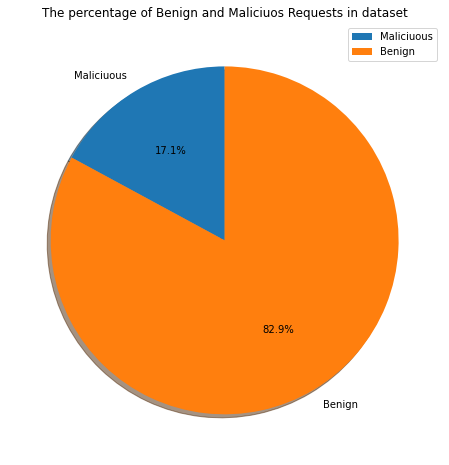

In [7]:
#normal ve saldırılı trafiği grafik üzerinde gösterdim

labels = [ "Maliciuous",'Benign' ]
sizes = [ dict( data.Attack.value_counts() )[ 1 ], dict( data.Attack.value_counts() )[ 0 ] ]
plt.figure( figsize = ( 13, 8 ) )
plt.pie( sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90 )
plt.legend( [ "Maliciuous", "Benign" ] )
plt.title( 'The percentage of Benign and Maliciuos Requests in dataset' )
plt.show()

In [8]:
#Logistic Regression, Decision Tree ve Random Forest Algoritmaları
class Model:
    global y
    def __init__( self, data ):
        self.data = data
        X = preprocessing.StandardScaler().fit( self.data ).transform( self.data )
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split( X, y, random_state = 42, test_size = 0.3 )  
    
    def LogisticRegression( self ):
        solvers = [ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga' ]

        start_time = time.time()
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression( C = 0.03, solver = solver ).fit( self.X_train, self.y_train )
            predicted_lr = LR.predict( self.X_test )
            accuracy_lr = accuracy_score( self.y_test, predicted_lr )
            #print("Accuracy: %.2f%%" % (accuracy_lr * 100.0))
            #print('################################################################')
            results_lr.append( { 'solver' : solver, 'accuracy': str( round( accuracy_lr * 100, 2 ) ) + "%", 
                                  'Coefficients': { 'W' : LR.coef_, 'b': LR.intercept_ } } )
            
            accuracy_list.append( accuracy_lr )
       
        solver_name = solvers[ accuracy_list.index( max( accuracy_list ) ) ]
        LR = LogisticRegression( C = 0.03, solver = solver_name ).fit( self.X_train, self.y_train )
        predicted_lr = LR.predict( self.X_test )
        accuracy_lr = accuracy_score( self.y_test, predicted_lr )
        print( "Accuracy: %.2f%%" % ( accuracy_lr * 100.0 ), '\n' )
        print( "########################################################################")
        print( 'Best solver is : ', solver_name )
        print( "########################################################################" )
        print( classification_report( predicted_lr, self.y_test ), '\n' )
        print( "########################################################################" )
        print( "--- %s seconds --- time for LogisticRegression" % ( time.time() - start_time ) )
        
    def DecisionTree( self ):
        start_time = time.time()
        tree = DecisionTreeClassifier()
        dt_search = GridSearchCV( tree, param_grid = { 'criterion' : [ 'gini', 'entropy' ],
                                           'max_depth' : [ 2, 3, 4,5, 6, 7, 8, 9, 10 ],
                                           'max_leaf_nodes' : [ 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 ] },
                           n_jobs = -1, cv = 5, scoring = 'accuracy', verbose = 2 )
        
        dt_search.fit( self.X_train, self.y_train )
        
        criterion = dt_search.best_params_[ 'criterion' ]
        max_depth = dt_search.best_params_[ 'max_depth' ]
        max_leaf_nodes = dt_search.best_params_[ 'max_leaf_nodes' ]
        
        dtree = DecisionTreeClassifier( criterion = criterion, 
                                       max_depth = max_depth, 
                                       max_leaf_nodes = max_leaf_nodes ).fit( self.X_train, self.y_train )
        predicted_dt = dtree.predict( self.X_test )
        accuracy_dt = metrics.accuracy_score( self.y_test, predicted_dt )
        print( f"criterion: { criterion }, max depth: { max_depth }, max_leaf: { max_leaf_nodes }" )
        print( f"The Accuracy is : { round( accuracy_dt * 100, 2 ) }%" )
        print( "########################################################################" )
        print( classification_report( predicted_dt, self.y_test ) )
        print( "########################################################################" )
        
        print( "--- %s seconds ---" % ( time.time() - start_time ) )
    
    def RandomForest( self ):
        start_time = time.time()
        RF = RandomForestClassifier( criterion = 'gini', 
                                     n_estimators = 500,
                                     min_samples_split = 10,
                                     #min_samples_leaf = 1,
                                     max_features = 'auto',
                                     oob_score = True,
                                     random_state = 1,
                                     n_jobs = -1 ).fit( self.X_train, self.y_train )
        
        predicted_rf = RF.predict( self.X_test )
        svm_accuracy = accuracy_score( self.y_test, predicted_rf )
        print( f"Accuracy of RF is : { round( svm_accuracy * 100, 2 ) }%", '\n' )
        print( "########################################################################" )
        print( classification_report( predicted_rf, self.y_test ) )
        print( "########################################################################" )
        
        print( "--- %s seconds ---" % ( time.time() - start_time ) )

# III .Prediction Without Feature Selection¶

In [9]:
df = data.copy() #ilk önce verisetini başka bir değişkene kopyalıyorum. Orijninal veri seti üzerinde değişiklilik yapmamak için
df = df.dropna() #verisetindeki NaN değeri olan satırları siliyor

In [10]:
X = df.drop( ['index', 'Unnamed: 0', 'Attack' ], axis = 1 )
# X değerlerim modele girdi olacağı için öncelikle index ve unnamed sütunlarını çıkartıyorum. 
# Attack benim çıktı değerlerim olacak. O yüzden X değişkenine almıyorum. Y'ye atıyorum. 
y = df.Attack

In [11]:
M = Model( X ) # Modelimi oluşturuyorum.

In [12]:
M.LogisticRegression()

Accuracy: 93.72% 

########################################################################
Best solver is :  newton-cg
########################################################################
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     12891
           1       0.73      0.89      0.80      2109

    accuracy                           0.94     15000
   macro avg       0.85      0.92      0.88     15000
weighted avg       0.95      0.94      0.94     15000
 

########################################################################
--- 7.489863872528076 seconds --- time for LogisticRegression


In [13]:
M.DecisionTree()

Fitting 5 folds for each of 180 candidates, totalling 900 fits
criterion: entropy, max depth: 5, max_leaf: 11
The Accuracy is : 97.11%
########################################################################
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     12663
           1       0.87      0.96      0.91      2337

    accuracy                           0.97     15000
   macro avg       0.93      0.97      0.95     15000
weighted avg       0.97      0.97      0.97     15000

########################################################################
--- 33.01910901069641 seconds ---


In [14]:
M.RandomForest()

Accuracy of RF is : 98.98% 

########################################################################
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12560
           1       0.94      1.00      0.97      2440

    accuracy                           0.99     15000
   macro avg       0.97      0.99      0.98     15000
weighted avg       0.99      0.99      0.99     15000

########################################################################
--- 7.196892976760864 seconds ---


# PREDICTION WITH FEATURE SELECTION

In [15]:
df1 = data.copy() # veri setimi tekrar başka bir değişkene atıyorum arijinal veri setinde üzerinde değişiklik yapmak istemiyorum

In [16]:
df1 = df1.dropna() # veri setinde Nan değerlerin olduğu sütunları siliyorum

In [17]:
# Feature Selection yaptım.
important_features = [
    'Fwd Pkts/s', #ileri yönde paket/saniye
    'Bwd Pkts/s', #Geri yönde paket/saniye
    'Fwd Seg Size Avg', #İleri yönde gözlemlenen ortalama boyut
    'Dst Port', #Destination Port
    'Flow Byts/s', #Akış byte
    'Flow Pkts/s', #Akış paket
    'Flow IAT Mean', #İki akış arasındaki ortalama sapma süresi
    'Fwd IAT Tot', #İleri yönde gönderilen iki paket arasındaki toplam süre
    'Bwd IAT Tot', #Geri yönde gönderilen iki paket arasındaki toplam süre
    'Flow Duration', #Akış Süresi
    'Pkt Size Avg', #Ortalama paket boyutu
    'Protocol', #Protokol
    'Active Max', #Bir akışın boşta olmadan önce etkin olduğu maksimum süre
    'Idle Max' #Bir akışın aktif hale gelmeden önce boşta kaldığı maksimum süre
                      
                     ]


# Featureların ağırlıkları 
weights = [
    17.87,
    15.16,
    13.64,
    12.97,
    11.35,
    11.35,
    9.68,
    9.66,
    8.95,
    4.92,
    2.33,
    1.31,
    1.11,
    1.11
]

In [18]:
# Seçtiğim feature'ları ve ağırlıklarını tabloda gösterdim.
weighted_features = pd.DataFrame( { 'features' :important_features,
                                 'weights' :weights } )
weighted_features

,features,weights
0,Fwd Pkts/s,17.87
1,Bwd Pkts/s,15.16
2,Fwd Seg Size Avg,13.64
3,Dst Port,12.97
4,Flow Byts/s,11.35
5,Flow Pkts/s,11.35
6,Flow IAT Mean,9.68
7,Fwd IAT Tot,9.66
8,Bwd IAT Tot,8.95
9,Flow Duration,4.92


In [19]:
X = df1[ important_features ] #seçtiğim feature'ları girdi modele girdi olarak vereceği X değişkenine atıyorum.
y = df1.Attack # Attack'lar çıktı değerlerim  

In [20]:
X.head() #seçtiğim featureların tablosunun başını görüntülüyorum

,Fwd Pkts/s,Bwd Pkts/s,Fwd Seg Size Avg,Dst Port,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Fwd IAT Tot,Bwd IAT Tot,Flow Duration,Pkt Size Avg,Protocol,Active Max,Idle Max
0,6.060606e+04,0.000000,0.000000,39939.0,0.00000,6.060606e+04,33.0,33.0,0.0,33.0,0.000000,6.0,0.0,0.0
1,3.663004e+03,4884.004884,53.666667,80.0,792429.79243,8.547009e+03,136.5,428.0,507.0,819.0,92.714286,6.0,0.0,0.0
2,3.030303e+04,30303.030303,0.000000,49984.0,0.00000,6.060606e+04,33.0,0.0,0.0,33.0,0.000000,6.0,0.0,0.0
3,6.666667e+05,0.000000,0.000000,50380.0,0.00000,6.666667e+05,3.0,3.0,0.0,3.0,0.000000,6.0,0.0,0.0
4,2.000000e+06,0.000000,0.000000,50616.0,0.00000,2.000000e+06,1.0,1.0,0.0,1.0,0.000000,6.0,0.0,0.0


In [21]:
M = Model( X ) # Modelimi oluşturuyorum.

In [22]:
M.LogisticRegression()

Accuracy: 84.70% 

########################################################################
Best solver is :  newton-cg
########################################################################
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     14476
           1       0.16      0.77      0.26       524

    accuracy                           0.85     15000
   macro avg       0.57      0.81      0.59     15000
weighted avg       0.96      0.85      0.89     15000
 

########################################################################
--- 1.6610920429229736 seconds --- time for LogisticRegression


In [23]:
M.DecisionTree()

Fitting 5 folds for each of 180 candidates, totalling 900 fits
criterion: entropy, max depth: 5, max_leaf: 10
The Accuracy is : 96.62%
########################################################################
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     12640
           1       0.86      0.94      0.90      2360

    accuracy                           0.97     15000
   macro avg       0.92      0.95      0.94     15000
weighted avg       0.97      0.97      0.97     15000

########################################################################
--- 8.905181646347046 seconds ---


In [24]:
M.RandomForest()

Accuracy of RF is : 98.31% 

########################################################################
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     12582
           1       0.92      0.98      0.95      2418

    accuracy                           0.98     15000
   macro avg       0.96      0.98      0.97     15000
weighted avg       0.98      0.98      0.98     15000

########################################################################
--- 4.441643953323364 seconds ---
